<a href="https://colab.research.google.com/github/Nusrat2002m/Student_preformance_prediction_ML/blob/main/Student_Performance_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First import necessary libraries**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

## **Step 1: Data Loading**

**Load and display the dataset**

In [ ]:
data = pd.read_csv("student_performance.csv")
data

,Student ID,Study_Hours,Attendance,Previous_Grades,Participation_activities,Parent_Edu,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No
...,...,...,...,...,...,...,...
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No


**Basic information about this dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student ID                40000 non-null  object 
 1   Study_Hours               38005 non-null  float64
 2   Attendance                38008 non-null  float64
 3   Previous_Grades           38006 non-null  float64
 4   Participation_activities  38000 non-null  object 
 5   Parent_Edu                38000 non-null  object 
 6   Passed                    38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


**Missing values check**

In [ ]:
data.isnull().sum()

,0
Student ID,0
Study_Hours,1995
Attendance,1992
Previous_Grades,1994
Participation_activities,2000
Parent_Edu,2000
Passed,2000


## **Step 2: Data Preprocessing**

**Fill missing values**

In [ ]:
data['Participation_activities'] = data['Participation_activities'].fillna(data['Participation_activities'].mode()[0])
data['Parent_Edu'] = data['Parent_Edu'].fillna(data['Parent_Edu'].mode()[0])

data['Study_Hours'] = data['Study_Hours'].fillna(data['Study_Hours'].median())
data['Attendance'] = data['Attendance'].fillna(data['Attendance'].median())
data['Previous_Grades'] = data['Previous_Grades'].fillna(data['Previous_Grades'].median())

** Encode variables**

In [ ]:
data['Participation_activities'] = data['Participation_activities'].map({'Yes': 1, 'No': 0})
data['Parent_Edu'] = data['Parent_Edu'].map({'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4, 'Unknown': -1})

data['Passed'] = data['Passed'].map({'Yes': 1, 'No': 0})

**Drop unnecessary columns**

In [ ]:
data = data.drop(columns=['Student ID'], axis=1)
data

,Study_Hours,Attendance,Previous_Grades,Participation_activities,Parent_Edu,Passed
0,12.5,75.3,75.0,1,3,1.0
1,9.3,95.3,60.6,0,0,0.0
2,13.2,75.3,64.0,0,1,0.0
3,17.6,76.8,62.4,1,2,0.0
4,8.8,89.3,72.7,0,3,0.0
...,...,...,...,...,...,...
39995,15.6,93.8,51.4,1,3,0.0
39996,11.3,66.4,64.2,0,4,1.0
39997,13.1,65.6,38.1,0,2,0.0
39998,14.1,74.9,65.2,1,3,0.0


## **Step 3: Exploratory Data Analysis (EDA)**

**Distribution of the target variable**

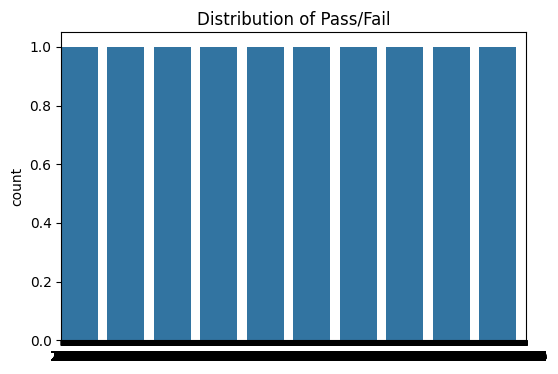

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data['Passed'])
plt.title("Distribution of Pass/Fail")
plt.show()

**Correlation Heatmap**

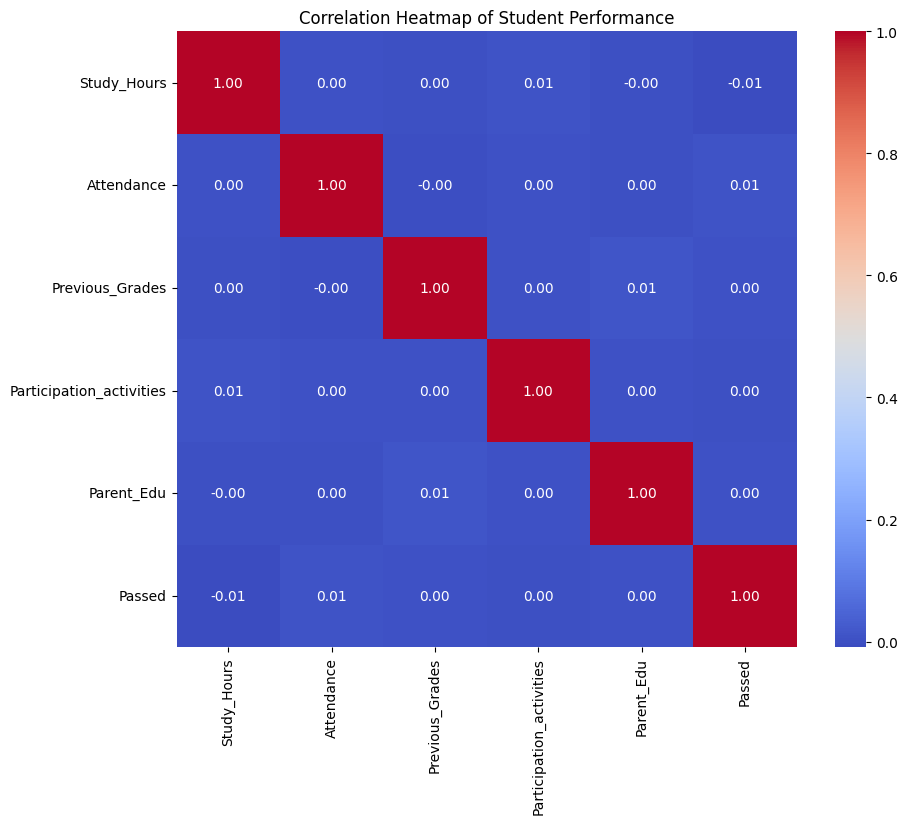

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Student Performance")
plt.show()

**Relationships between features and target**

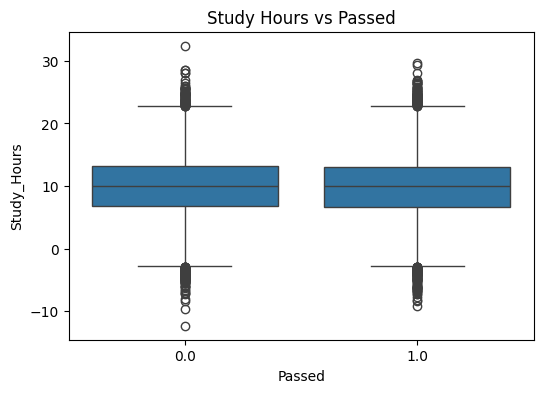

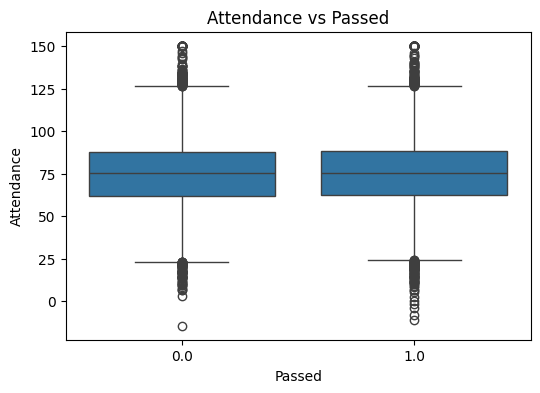

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Passed', y='Study_Hours', data=data)
plt.title("Study Hours vs Passed")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Passed', y='Attendance', data=data)
plt.title("Attendance vs Passed")
plt.show()

## Step 4 : **Feature Scaling**

**Separate features and target variable**

In [ ]:
X = data.drop(columns=['Passed'], axis=1)
y = data['Passed']

**Scale numerical features**

In [ ]:
scaler = StandardScaler()
X[['Study_Hours', 'Attendance', 'Previous_Grades']] = scaler.fit_transform(X[['Study_Hours', 'Attendance', 'Previous_Grades']])

## **Step 5: Train-Test Split**

**Split the dataset into training and test sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Testing data set for 20% test size:\n',X_test)
print('Training data set for 20% test size:\n',X_train)
print('Dependent class data:\n',y_test)
print('Independent class data:\n',y_train)

Testing data set for 20% test size:
        Study_Hours  Attendance  Previous_Grades  Participation_activities  \
32823     1.414225   -0.109539        -1.400447                         0   
16298    -1.624094   -0.567311         0.899634                         1   
28505     0.455829    0.001132         0.638544                         1   
6689     -0.706481   -0.532098        -0.287705                         0   
26893     1.924010    0.841219         1.241538                         0   
...            ...         ...              ...                       ...   
13618    -1.868791    0.136954        -0.300138                         1   
35165     0.578177    0.936798         0.526648                         0   
16359     1.026788    0.438782        -0.256623                         1   
3842      1.006397   -0.396275         1.023962                         0   
37682    -0.890004    1.731612        -0.884483                         0   

       Parent_Edu  
32823           1 

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## **Step 6: Model Training with Logistic Regression**

**Initialize the Logistic Regression model**

In [ ]:
log_reg=LogisticRegression()
log_reg = LogisticRegression(random_state=42)

**Train the model**

In [ ]:
y_train = (y_train > 0.5).astype(int)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

## **Step 7: Model Evaluation**

**Make predictions on the test set**

In [ ]:
X_test = X_test[:y_test.shape[0], :]
nan_indices = np.isnan(y_test)
y_test = y_test[~nan_indices]
X_test = X_test[~nan_indices]
y_pred = log_reg.predict(X_test)

**Evaluate accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


**Final Classification report**

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67      3794
         1.0       0.33      0.00      0.00      3788

    accuracy                           0.50      7582
   macro avg       0.42      0.50      0.33      7582
weighted avg       0.42      0.50      0.33      7582



**Confusion matrix**


Confusion Matrix:


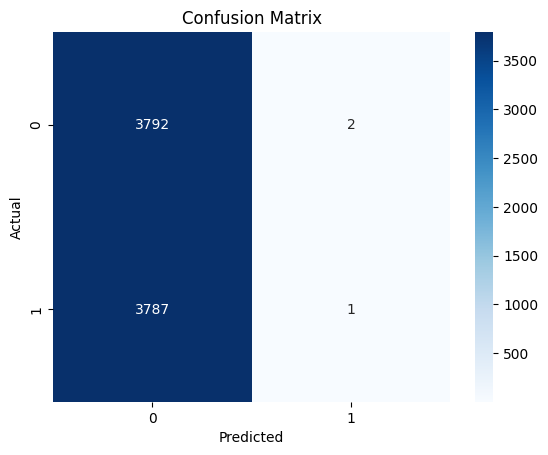

In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**ROC-AUC score**

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.50


**Plot ROC Curve**

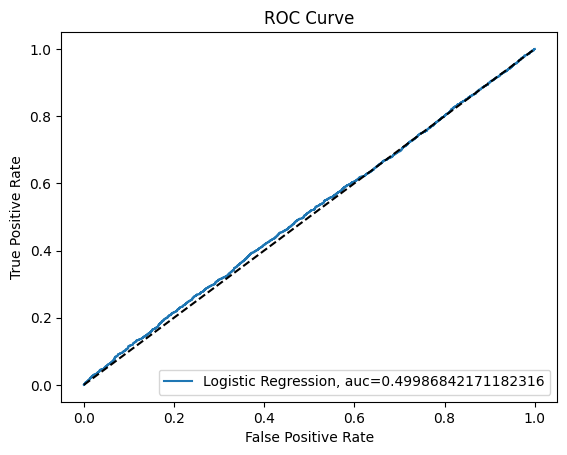

In [ ]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="Logistic Regression, auc="+str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc=4)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## **Step 8: Cross-Validation**

**Use cross-validation to verify model stability**

In [ ]:
y = y.astype(int)
cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.52525  0.524875 0.524625 0.52475  0.52525 ]
Mean Cross-Validation Score: 0.52


## **Step 9: Feature Interpretation**

**Model Coefficients**

In [ ]:
coefficients = pd.DataFrame(log_reg.coef_[0], X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nFeature Coefficients:")
coefficients


Feature Coefficients:


,Coefficient
Attendance,0.011389
Participation_activities,0.005721
Previous_Grades,0.005230
Parent_Edu,0.003060
Study_Hours,-0.021825


## **Step 10: Conclusion**

In [ ]:
print("\nConclusion:")
print("The logistic regression model predicts whether a student will pass or fail based on various factors.")
print(f"The model achieved an accuracy of {accuracy:.2f} and an ROC-AUC score of {roc_auc:.2f}.")
print("Important features that influence student performance include Study Hours, Attendance Rate, and Previous Grades.")


Conclusion:
The logistic regression model predicts whether a student will pass or fail based on various factors.
The model achieved an accuracy of 0.50 and an ROC-AUC score of 0.50.
Important features that influence student performance include Study Hours, Attendance Rate, and Previous Grades.


# **Naive Bayes**

In [ ]:
NV = GaussianNB()

In [ ]:
data = data.dropna(subset=['Passed'])
NV.fit(X_train, y_train)

GaussianNB()

In [ ]:
NV_pred = NV.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, NV_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, NV_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.99      0.67      3794
         1.0       0.61      0.01      0.02      3788

    accuracy                           0.50      7582
   macro avg       0.55      0.50      0.34      7582
weighted avg       0.55      0.50      0.34      7582



In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, NV_pred)
print(conf_matrix)


Confusion Matrix:
[[3768   26]
 [3748   40]]



Confusion Matrix:


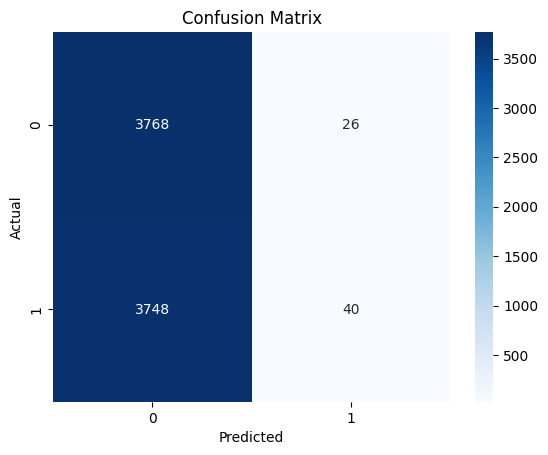

In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, NV_pred)
conf_matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, NV_pred)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.50


In [ ]:
cv_scores = cross_val_score(NV, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.522875 0.524125 0.520375 0.52475  0.525125]
Mean Cross-Validation Score: 0.52


# **KNN**

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
kpred = knn_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, kpred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, kpred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.56      0.53      3794
         1.0       0.50      0.44      0.47      3788

    accuracy                           0.50      7582
   macro avg       0.50      0.50      0.50      7582
weighted avg       0.50      0.50      0.50      7582



In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, kpred)
print(conf_matrix)


Confusion Matrix:
[[2116 1678]
 [2116 1672]]


In [ ]:
roc_auc = roc_auc_score(y_test, kpred)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.50


In [ ]:
cv_scores = cross_val_score(knn_model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.500875 0.502125 0.50575  0.506625 0.503   ]
Mean Cross-Validation Score: 0.50


In [ ]:
k_range = range(1, 21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())

In [ ]:
best_k = k_range[np.argmax(k_scores)]
print(f"\nBest k value: {best_k}, Cross-Validation Accuracy: {max(k_scores):.2f}")


Best k value: 4, Cross-Validation Accuracy: 0.51


# **Decision Tree Classifier**

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
tree_model.fit(X_train, y_train)
Dpred = tree_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, Dpred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.50


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, Dpred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.91      0.65      3794
         1.0       0.50      0.09      0.15      3788

    accuracy                           0.50      7582
   macro avg       0.50      0.50      0.40      7582
weighted avg       0.50      0.50      0.40      7582



In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, Dpred)
print(conf_matrix)


Confusion Matrix:
[[3460  334]
 [3453  335]]


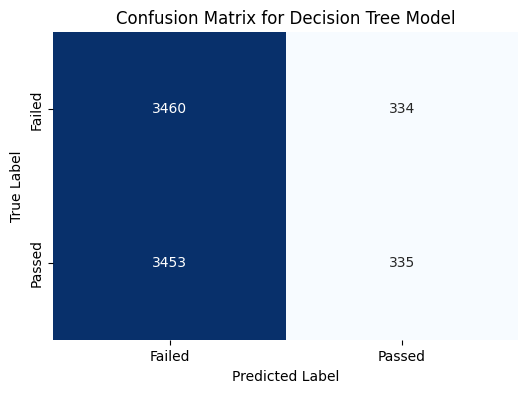

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Failed", "Passed"], yticklabels=["Failed", "Passed"])
plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, Dpred)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.50


In [ ]:
cv_scores = cross_val_score(tree_model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.516375 0.517125 0.52475  0.5245   0.524125]
Mean Cross-Validation Score: 0.52


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10, 20]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters from Grid Search: {'max_depth': 3, 'min_samples_split': 5}
Best Cross-Validation Score: 0.52496875


In [ ]:
best_tree_model = grid_search.best_estimator_
best_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)

In [ ]:
y_pred_best = best_tree_model.predict(X_test)
print("\nAccuracy with Best Parameters:", accuracy_score(y_test, y_pred_best))


Accuracy with Best Parameters: 0.5005275652862041


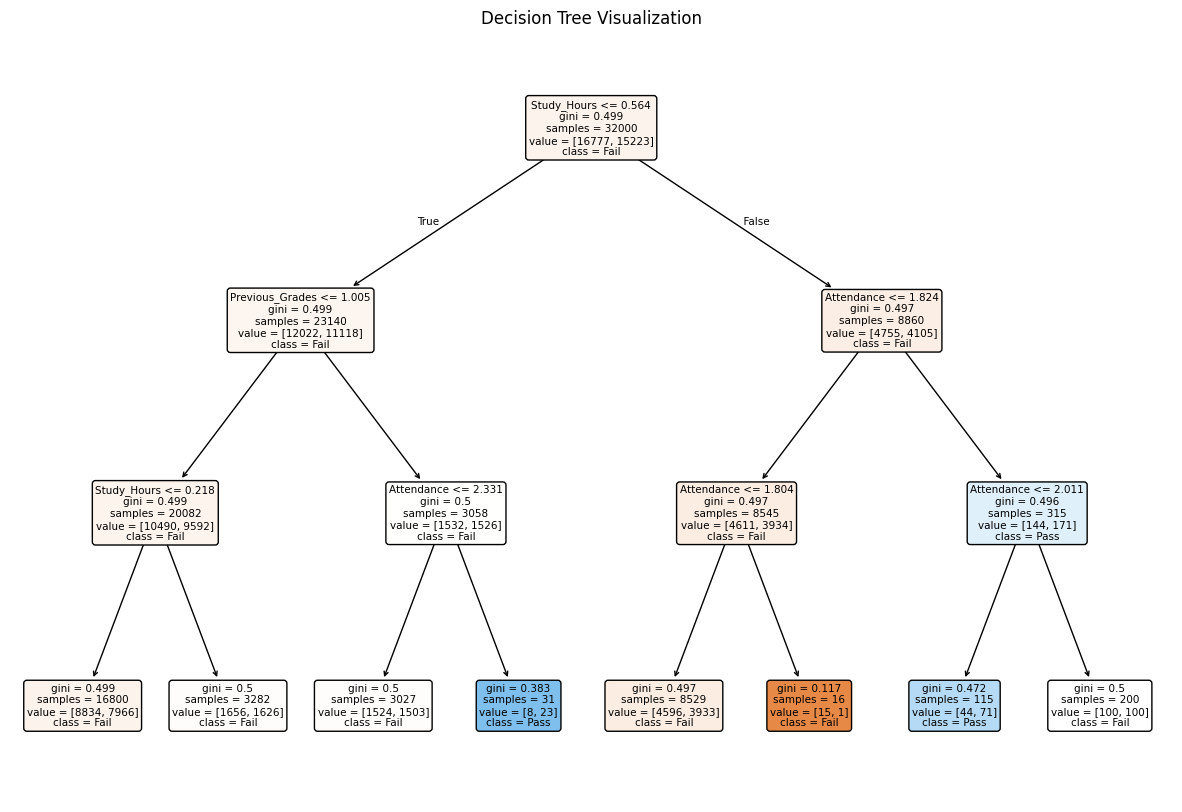

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(best_tree_model, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# **Random Forest Classifier**

In [ ]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=5)
rf_model.fit(X_train, y_train)
r_pred = rf_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, r_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.51


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, r_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.91      0.65      3794
         1.0       0.52      0.10      0.17      3788

    accuracy                           0.51      7582
   macro avg       0.51      0.50      0.41      7582
weighted avg       0.51      0.51      0.41      7582



In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, r_pred)
print(conf_matrix)


Confusion Matrix:
[[3445  349]
 [3403  385]]


In [ ]:
roc_auc = roc_auc_score(y_test, r_pred)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


ROC-AUC Score: 0.50


In [ ]:
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.52125  0.512375 0.513875 0.524375 0.519375]
Mean Cross-Validation Score: 0.52


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters from Grid Search: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.52471875


In [ ]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=200,
                       random_state=42)

In [ ]:
y_pred_best = best_rf_model.predict(X_test)
print("\nAccuracy with Best Parameters:", accuracy_score(y_test, y_pred_best))


Accuracy with Best Parameters: 0.5014508045370615


In [ ]:
feature_importances = pd.DataFrame(best_rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                          Importance
Attendance                  0.326521
Study_Hours                 0.295142
Previous_Grades             0.291327
Parent_Edu                  0.063567
Participation_activities    0.023444


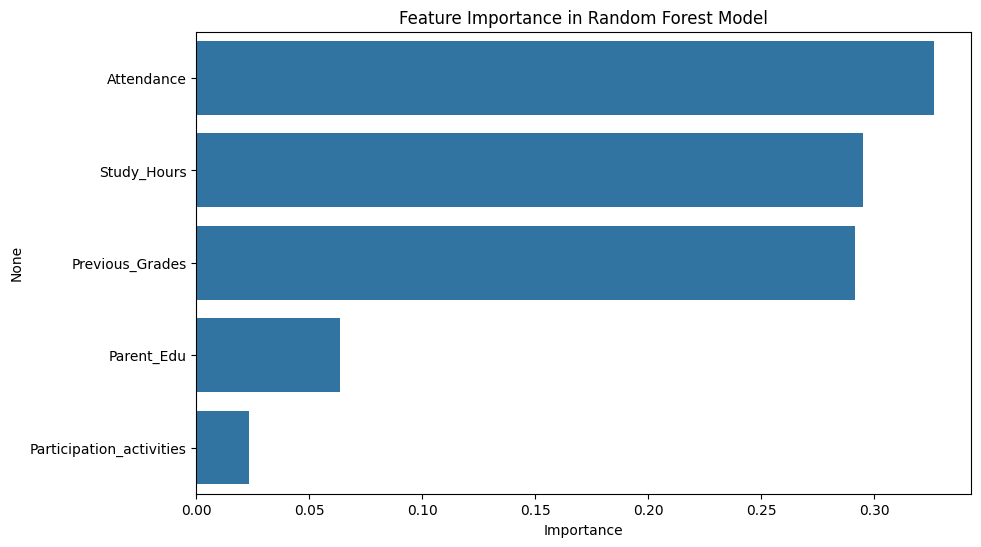

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances['Importance'], y=feature_importances.index)
plt.title("Feature Importance in Random Forest Model")
plt.show()

# **SVM**

In [ ]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
spred = svm_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, spred)
print(f"Accuracy: {accuracy:.2f}")

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, spred))

In [ ]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, spred)
print(conf_matrix)

In [ ]:
spred_proba = svm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, spred_proba)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

In [ ]:
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}


In [ ]:
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [ ]:
print("\nBest Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

In [ ]:
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

In [ ]:
y_pred_best = best_svm_model.predict(X_test)
print("\nAccuracy with Best Parameters:", accuracy_score(y_test, y_pred_best))